<a href="https://colab.research.google.com/github/PreethaVen/Coursera_Capstone/blob/main/Battle_of_Neighborhoods_Newyork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction & Background**
New York is the most ethnically diverse, commercially driven, and the most attractive urban centre in the country. New York always meant possibility, for it was an urban centre on its way to something better, a metropolis too busy to be solicitous of those who stood in the way of progress. New York has remained prosperous even as it underwent change, its strength lying in its diversity. New York still continues to welcome many newcomers into the city’s “golden door” to this day.

The investor was fascinated with the city’s café and bakery culture but noticed that it was all so focused on trends from people to the décor and even the food lacked a warm, welcoming environment - a homelike feeling. With the idea to offer a unique experience and a welcoming place to eat, drink and gather with friends, starting a patisserie in New York City seemed very challenging. As with any food and beverage industry, finding the best location is one of the key factors that will determine its success or failure. 

Choosing a location is one of the more permanent choices a restaurant owner makes. You cannot move without significant expense and trouble. So, making a snap decision without doing any research may leave an owner with a location he or she may later regret.

**Business Problem** 
This project aims to find the best neighborhoods in New York City to open a Bakery/Patisserie that would attract the culturally diverse population. It should have great visibility, should be easy to find and should attract enough initial customer interest.

With the help of Data Science methodology and tools, this project aims at addressing the business problem by helping the investor find the best locations in New York City, to start the business keeping in mind all the essential factors. 

**Data Requirement**
I will need the following data to address the business question:

1. The entire New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, I will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough
2. The latitude and longitude coordinates for each neighborhood 
3. Possibility to explore each neighborhood with venue categories relevant to bakery/pastry shops. This data will be used for further analysis and modelling to decide the best locations

**Data Source and Extraction**
New York city data containing the neighborhoods and boroughs was obtained from the open data source: https://cocl.us/new_york_dataset. This dataset had the corresponding latitude and longitude co-ordinates for each neighborhood. I used python Geocoder package to extract co-ordinates for New York city to diplay the neighborhoods and boroughs on a map using folium. I used the Foursquare API to explore venues in the neighborhoods of New York City. I constructed a URL to send a request to the Foursquare API to explore venues for the langitude and longitude co-ordinates specified in my dataset (Neighborhoods of New York). I analysed the results using matplotlib library from python to visualize the data for deeper analysis. I used k-means clustering algorithm to complete this task that helped answer the business questions. 
Finally, I used Folium library to visualize the neighborhoods in New York City and their emerging clusters.


# Importing all the dependencies

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 4.2MB/s 
Libraries imported.


# Creating required fuctions to be accessed as we move along the code

In [90]:
#Function to extract New York dataset
def get_newyork_dataset():
    url='https://cocl.us/new_york_dataset'
    # make the GET request
    ny_data=requests.get(url).json()
    # all data is present in features label
    features=ny_data['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude'] 
    # instantiate the dataframe
    new_york_dataset = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        location = data['geometry']['coordinates']
        neighborhood_lat = location[1]
        neighborhood_lon = location[0]
        new_york_dataset = new_york_dataset.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Neighborhood Latitude': neighborhood_lat,
                                          'Neighborhood Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_dataset

# Defining Foursquare Credentials and Version
CLIENT_ID = 'LP0QY4R0Z0V5IGNXBCLGXDT343PXZJPXXBFBEPIQJQJGZHWK' # your Foursquare ID
CLIENT_SECRET = 'AJXJMM3Z4Q3A311MCIHUSF1T3HTZODYX3YKJIESQ3OF4UCHM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#Function to explore venues from Forsquare API for preferred Locations/Neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    print(venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    #print(nearby_venues) 
    return(nearby_venues)


# Loading and Exploring New York data

In [21]:
newyork_data = get_newyork_dataset()
newyork_data.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [23]:
#information of New York data
newyork_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 306 non-null    object 
 1   Neighborhood            306 non-null    object 
 2   Neighborhood Latitude   306 non-null    float64
 3   Neighborhood Longitude  306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


In [24]:
# Shape of new york data
print("Shape of New York data: ", newyork_data.shape)
print("Number of rows: ",newyork_data.shape[0] )
print("Number of columns: ", newyork_data.shape[1])

Shape of New York data:  (306, 4)
Number of rows:  306
Number of columns:  4


## Data Analysis with Visualizations

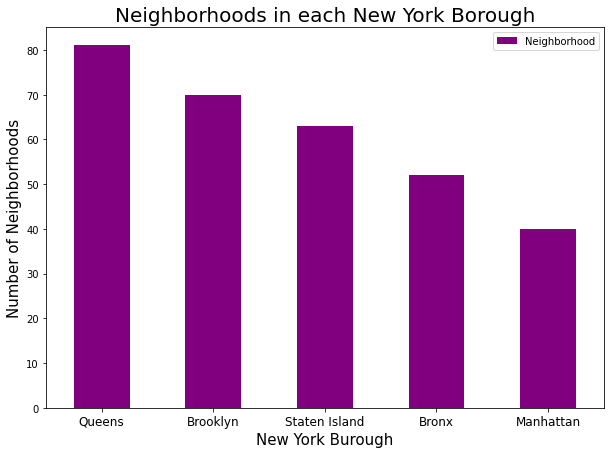

In [25]:
plt.figure(figsize = (10,7))
newyork_data.groupby("Borough").count().sort_values(by = "Neighborhood", ascending = False)["Neighborhood"].plot(kind ="bar", color = 'purple')
plt.xlabel("New York Burough", fontsize = 15)
plt.ylabel("Number of Neighborhoods", fontsize = 15)
plt.title("Neighborhoods in each New York Borough", fontsize = 20)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.legend()
plt.show()


In [26]:
# Using geopy to get the latitude and longitude values of New York City
from geopy.geocoders import Nominatim

address = "New York City, NY"

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of New York city are {} and {}.".format(latitude, longitude))

The geographical coordinates of New York city are 40.7127281 and -74.0060152.


# Visualizing the Neighborhoods and Buroughs of New York on a Map

In [27]:
# using folium to visualize the Neighborhoods and Buroughs of New York

map_newyork = folium.Map(location = [latitude, longitude], zoom_start =10)

# add markers to map
for lat, lng, borough, neighborhood in zip(newyork_data["Neighborhood Latitude"], newyork_data['Neighborhood Longitude'], newyork_data['Borough'], newyork_data['Neighborhood']):
  label = '{}, {}'.format(neighborhood, borough)
  label = folium.Popup(label, parse_html=False)
  folium.CircleMarker(
      location = [lat,lng],
      radius = 5,
      popup = label,
      color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
  ).add_to(map_newyork)

map_newyork  

# Utilizing the Foursquare API to explore venues in the neighborhoods of NYC and segment them

In [13]:
ny_venues = getNearbyVenues(names = newyork_data["Neighborhood"], latitudes = newyork_data["Neighborhood Latitude"], longitudes = newyork_data["Neighborhood Longitude"])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [14]:
# Checking the size of the resulting dataframe
print(ny_venues.shape)

(10115, 7)


In [15]:
# Saving the resulting data (ny_venues) to a .csv file due to limited calls on FourSquare
ny_venues.to_csv('ny_venues1.csv', index = False)

In [16]:
#Reading data from csv to padas dataframe for further analysis
venues_ny = pd.read_csv('ny_venues1.csv')
venues_ny.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [39]:
#Selecting only the rows that have Venue Category as Bakery for further analysis
ny_bakery = venues_ny[ny_venues["Venue Category"]== 'Bakery'].reset_index(drop= True)
#Adding Borough feature 
ny_bakery = ny_bakery.join(newyork_data[["Borough", "Neighborhood"]].set_index("Neighborhood"), on = 'Neighborhood')
ny_bakery = ny_bakery[["Borough", "Neighborhood", "Venue", "Venue Category", "Venue Latitude", "Venue Longitude"]]
print("Number of Bakeries in NY City: ", ny_bakery.shape[0])
ny_bakery.head()

Number of Bakeries in NY City:  245


,Borough,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Bronx,Kingsbridge,S & S Cheesecake,Bakery,40.884793,-73.899861
1,Bronx,Kingsbridge,Sugarboy Bakery Cafe,Bakery,40.877948,-73.902860
2,Bronx,Kingsbridge,Stella D'oro Biscuit Co,Bakery,40.883202,-73.900436
3,Bronx,Woodlawn,Angelica's Bakery,Bakery,40.899183,-73.867553
4,Bronx,Pelham Parkway,Ana's Bakery & Cafe,Bakery,40.856022,-73.856049


##There are 245 Bakeries in all of New York City.

##Further analysis shows that Manhattan has the most number of Bakeries with Chelsea Neighborhood topping the list. There are 10 bakeries in Chelsea alone and it is located in Manhattan Burough. 

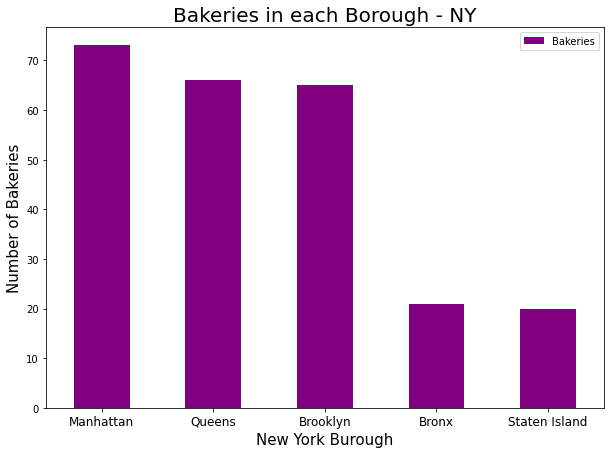

In [40]:
#Visualizing NY Boroughs with the most number of Bakeries
plt.figure(figsize = (10,7))
ny_bakery.groupby("Borough").count().sort_values(by = "Neighborhood", ascending = False)["Neighborhood"].plot(kind = 'bar', color = 'purple', label = "Bakeries")
plt.xlabel("New York Burough", fontsize = 15)
plt.ylabel("Number of Bakeries", fontsize = 15)
plt.title("Bakeries in each Borough - NY", fontsize = 20)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.legend()
plt.show()

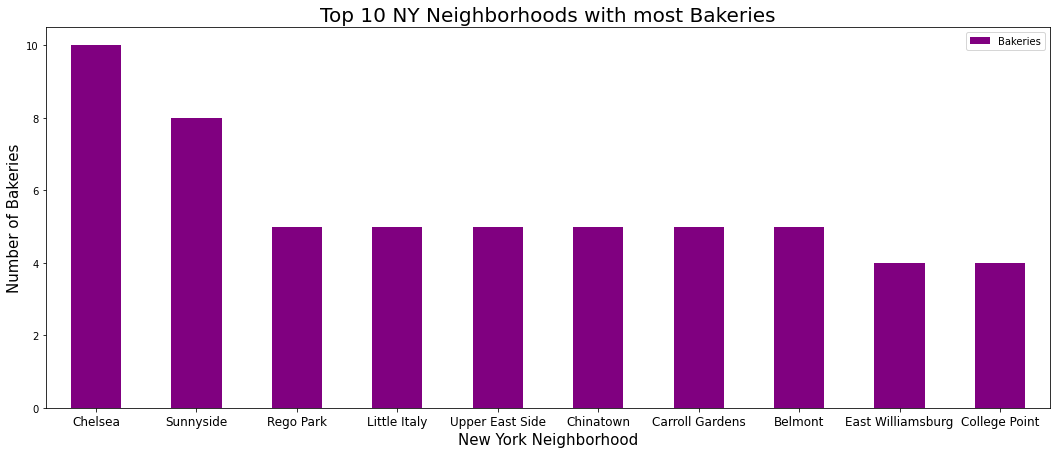

In [41]:
#Visualizing Top 10 NY Neighborhoods with the most number of Bakeries
plt.figure(figsize = (18,7))
ny_bakery.groupby("Neighborhood").count().sort_values("Venue", ascending = False)["Venue"][:10].plot(kind = 'bar', color = 'purple', label = "Bakeries")
plt.xlabel("New York Neighborhood", fontsize = 15)
plt.ylabel("Number of Bakeries", fontsize = 15)
plt.title("Top 10 NY Neighborhoods with most Bakeries", fontsize = 20)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.legend()
plt.show()

## Based on above analysis, Manhattan is one of the best Boroughs to start a bakery. For further analysis, I am using KMeans Clustering algorithm to find similar neighborhoods in Manhattan to start a bakery. I am looking for a location that will answer the following business questions. 

1.   Must attract enough initial customer interest
2.   Must have great visibility and should be easy to find 



In [51]:
#Slicing the newyork dataset to retrieve only the neighborhoods in Manhattan
Manhattan_data = newyork_data[newyork_data["Borough"] == 'Manhattan'].reset_index(drop = True)
Manhattan_data.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [59]:
# Exploring venues in Manhattan using Foursquare API
manhattan_venues = getNearbyVenues(names = Manhattan_data["Neighborhood"], latitudes = Manhattan_data["Neighborhood Latitude"], longitudes = Manhattan_data["Neighborhood Longitude"])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
[[('Marble Hill', 40.87655077879964, -73.91065965862981, "Arturo's", 40.87441177110231, -73.91027100981574, 'Pizza Place'), ('Marble Hill', 40.87655077879964, -73.91065965862981, 'Bikram Yoga', 40.876843690797934, -73.90620384419528, 'Yoga Studio'), ('Marble Hill', 40.87655077879964, -73.91065965862981, 'Tibbett Diner', 40.8804044222466, -73.90893738006402, 'Diner'), ('Marble Hill', 40.87655077879964, -73.91065965862981, "Dunkin'", 40.87713584201589, -73.90666550701411, 'Donut Sh

In [61]:
# Saving the resulting data (manhattan_venues) to a .csv file due to limited calls on FourSquare
manhattan_venues.to_csv('manhattan_venues.csv', index = False)

In [64]:
# Reading data from csv file to pandas dataframe
venues_manhattan = pd.read_csv('manhattan_venues.csv')
#Printing and displaying the data
print("Number of Venues in Manhattan: ", venues_manhattan.shape[0])
venues_manhattan.head()

Number of Venues in Manhattan:  3203


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


## Data Preparation for Clustering

In [65]:
#one hot encoding the Venue Category from manhattan venues dataseset - Preparing data for Cluster analysis
manhattan_onehot = pd.get_dummies(venues_manhattan["Venue Category"], prefix="", prefix_sep="")

#add Neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = venues_manhattan["Neighborhood"]

#move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[: -1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping

In [68]:
#Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category - Data prep for cluster analysis
manhattan_grouped = manhattan_onehot.groupby("Neighborhood").mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping

## Creating the new dataframe to display the top 10 venues for each neighborhood in Manhattan 

In [84]:
# Writing a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
    
# Creating the new dataframe and display the top 10 venues for each neighborhood.   
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Hotel,Park,Clothing Store,Gym,Memorial Site,Plaza,Playground,Burger Joint,Gourmet Shop
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,French Restaurant,Pizza Place,Wine Shop,Cosmetics Shop,Bakery,Gym / Fitness Center,Gym
2,Central Harlem,African Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Bar,Pizza Place,Restaurant,Boutique
3,Chelsea,Coffee Shop,Art Gallery,Bakery,Wine Shop,Ice Cream Shop,American Restaurant,French Restaurant,Café,Italian Restaurant,Cupcake Shop
4,Chinatown,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Ice Cream Shop,Optical Shop,Vietnamese Restaurant,Shanghai Restaurant,Dim Sum Restaurant


# Clustering Neighborhoods in Manahattan to find neighborhoods that share similar characteristics

Running _k_-means to cluster the neighborhood into 3 clusters

In [82]:
from sklearn.cluster import KMeans

manhattan_grouped_clustering = manhattan_grouped.drop("Neighborhood", axis =1)

# run k-means clustering
kclusters = 3
kmeans = KMeans(n_clusters = kclusters, random_state =0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int32)

# Adding Cluster labels to the dataset containing top 10 venues per neighborhood in Manhattan

In [85]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = Manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Gym,Discount Store,Sandwich Place,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Shopping Mall,Seafood Restaurant,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Ice Cream Shop,Optical Shop,Vietnamese Restaurant,Shanghai Restaurant,Dim Sum Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Bakery,Mobile Phone Shop,Grocery Store,Bank,Gym,Chinese Restaurant,Latin American Restaurant,Tapas Restaurant,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Lounge,Restaurant,Café,Bakery,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Deli / Bodega,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Pizza Place,Deli / Bodega,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,School,Sushi Restaurant,Bakery,Caribbean Restaurant


# Visualizing the resulting clusters

In [86]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Neighborhood Latitude'], manhattan_merged['Neighborhood Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examinng the Clusters to determine the best neighborhoods in Manhattan to start a Bakery/Patisserie

# Cluster 1 

### **NOT a preferred cluster** to open a new Bakery/Patisserie. Does not answer the business questions as compared to Cluster 2 and 3.

In [87]:
manhattan_merged.loc[manhattan_merged["Cluster Labels"] ==0, manhattan_merged.columns[[1] + list(range(5,manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Boat or Ferry,Baseball Field,Heliport,Gas Station,Skating Rink,Bistro,Farmers Market,Gym / Fitness Center


# Cluster 2

### Seems like the **MOST preferred cluster to start a new Bakery/Patisserie**. It has a lot of restaurants and bakeries that are among the top most venues in these Neighborhoods. 

In [88]:
manhattan_merged.loc[manhattan_merged["Cluster Labels"] ==1, manhattan_merged.columns[[1] + list(range(5,manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,Bakery,American Restaurant,Spa,Ice Cream Shop,Optical Shop,Vietnamese Restaurant,Shanghai Restaurant,Dim Sum Restaurant
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Grocery Store,Bank,Gym,Chinese Restaurant,Latin American Restaurant,Tapas Restaurant,Coffee Shop
3,Inwood,Mexican Restaurant,Lounge,Restaurant,Café,Bakery,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Deli / Bodega,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Deli / Bodega,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,School,Sushi Restaurant,Bakery,Caribbean Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place,Taco Place,Grocery Store,Restaurant,Café
15,Midtown,Hotel,Clothing Store,Sporting Goods Shop,Theater,Coffee Shop,Steakhouse,Café,Bakery,Bookstore,Cocktail Bar
17,Chelsea,Coffee Shop,Art Gallery,Bakery,Wine Shop,Ice Cream Shop,American Restaurant,French Restaurant,Café,Italian Restaurant,Cupcake Shop
19,East Village,Bar,Pizza Place,Mexican Restaurant,Korean Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Salon / Barbershop,Cocktail Bar,Wine Bar,Coffee Shop
20,Lower East Side,Art Gallery,Chinese Restaurant,Japanese Restaurant,Bakery,Café,Ramen Restaurant,Coffee Shop,Yoga Studio,Bubble Tea Shop,Pet Café
22,Little Italy,Café,Bakery,Chinese Restaurant,Italian Restaurant,Bubble Tea Shop,Mediterranean Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Salon / Barbershop


# Cluster 3

### Although this cluster has many restaurants among it's top venues, it does not look as popular compared to cluster 2. 

### As a result, this is **NOT a preferred cluster** to start a new Bakery/Patisserie. 

In [89]:
manhattan_merged.loc[manhattan_merged["Cluster Labels"] ==2, manhattan_merged.columns[[1] + list(range(5,manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Gym,Discount Store,Sandwich Place,Coffee Shop,Yoga Studio,Pizza Place,Steakhouse,Shopping Mall,Seafood Restaurant,Department Store
5,Manhattanville,Coffee Shop,Chinese Restaurant,Deli / Bodega,Sushi Restaurant,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Café,Bike Trail,Supermarket
6,Central Harlem,African Restaurant,Seafood Restaurant,Chinese Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Bar,Pizza Place,Restaurant,Boutique
8,Upper East Side,Italian Restaurant,Coffee Shop,Exhibit,Bakery,American Restaurant,Gym / Fitness Center,Yoga Studio,Juice Bar,Cosmetics Shop,French Restaurant
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Deli / Bodega,Wine Shop,Diner,Bar,Sushi Restaurant,Japanese Restaurant,Pizza Place
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Café,Cocktail Bar,Gym,Burger Joint,Gym / Fitness Center,Salon / Barbershop
11,Roosevelt Island,Park,Greek Restaurant,Coffee Shop,Gym / Fitness Center,Gym,Baseball Field,Outdoors & Recreation,Soccer Field,Liquor Store,Sandwich Place
12,Upper West Side,Italian Restaurant,Bar,Coffee Shop,Bakery,Indian Restaurant,Wine Bar,Café,Yoga Studio,Sports Bar,Breakfast Spot
13,Lincoln Square,Café,Plaza,Concert Hall,Theater,Performing Arts Venue,Gym / Fitness Center,Wine Shop,French Restaurant,Indie Movie Theater,Bakery
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,American Restaurant,Gym,Cocktail Bar,Spa,Sandwich Place,Hotel


# Conclusion

Cluster 2 in Manhattan has the **MOST preferred neighborhoods** with a lot restaurants and bakeries among the top 10 venues. Starting a Patisserie here will yield great success and consistent profit due to high visibility, easy to locate and ability to attract enough initial customer interest. 

As a final note, all of the above analysis is dependent on the accuracy of Foursquare data. 

Future enhancements: This data and model can be used for more detailed and comprehensive analysis in the future to find **the BEST neighborhood in Cluster 2** to open a new Patisserie/Bakery.

